# A simple pipeline using conditional logic

Calculate `A + B` with A and B random numbers < 100 and returns:
- `True` if result > 100 
- `False` otherwise.

add(79, 32)
Résultats du pipeline: ('Display', {'GenA': 79, 'GenB': 32, 'A': 111, 'Display': True}, (0.000179290771484375, {'GenA': 2.6226043701171875e-05, 'GenB': 2.86102294921875e-06, 'A': 0.0001442432403564453, 'Display': 5.9604644775390625e-06})) 

Résultat du dernier noeud: True 

Error during PNG generation


Error: Unknown HTML element <lambda> on line 1 
in label of node Display


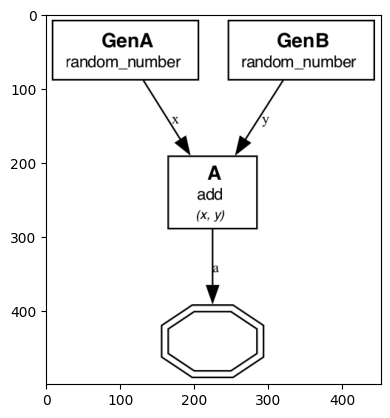

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath("../../"))

from pipeoptz import Pipeline, Node, NodeIf

def add(x, y):
    print(f"add({x}, {y})")
    return x + y

def random_number():
    import random
    num = random.randint(1, 100)
    return num

pipeline = Pipeline("Example Pipeline", "This is an example pipeline.")  # Create pipeline

# Create nodes
node_gen_a = Node("GenA", random_number)  # Generates a random number A
node_gen_b = Node("GenB", random_number)  # Generates a random number B
node_a = Node("A", add, fixed_params={"x": 10, "y": 3})  # A = 5 + 3 = 8
node_display = Node("Display", lambda a: a > 100)  # Display value
# node_if =  NodeIf(id="NodeCheck",  condition_func=lambda a, b: a + b > 100, true_pipeline=node_display, false_pipeline=node_display)

# Create pipeline by adding nodes dependencies
pipeline.add_node(node_gen_a)
pipeline.add_node(node_gen_b)
pipeline.add_node(node_a, predecessors={"x": "GenA", "y": "GenB"})
pipeline.add_node(node_display, predecessors={"a": "A"})
# pipeline.add_node(node_if, predecessors={"a": "A", "b": "GenB"})
# pipeline.add_node(node_display, predecessors={"a": "NodeCheck"})

outputs = pipeline.run()
print("Résultats du pipeline:", outputs, "\n")
print("Résultat du dernier noeud:", outputs[1][pipeline.static_order()[-1]], "\n")
pipeline.to_dot("pipeline_example.dot", generate_png=True)
# Display generated PNG
plt.imshow(Image.open("pipeline_example.png"))
